# Tarea 13: Modelos conjugados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom, beta

## Beta-Binomial

Una compañía farmacéutica afirma que su nueva medicina incrementa la probabilidad de concebir un niño (sexo masculino), pero aún no publican estudios. Supón que conduces un experimento en el cual $50$ parejas se seleccionan de manera aleatoria de la población, toman la medicina y conciben. Nacen $30$ niños y $20$ niñas.
1) Quieres estimar la probabilidad de concebir un niño para parejas que toman la medicina. ¿Cuál es una inicial apropiada?, experimenta con la distribución Beta para elegir. No tiene que estar centrada en `0.5` pues esta corresponde a personas que no toman la medicina, y la inicial debe reflejar tu incertidumbre sobre el efecto de la droga.

>Una distribución de probabilidad inicial apropiada sería utiliza $B(3,2)$. Esto debido a que con estos valores se conserva la proporción, pero no se le da tanto peso a la inicial sobre la verosimilitud.

In [2]:
a = 3
b = 2

print(f"Con valores a: {a} y b: {b}, se tiene una distribución beta centrada en {beta.stats(a, b)[0]}")

Con valores a: 3 y b: 2, se tiene una distribución beta centrada en 0.6


>Examinamos la forma que tomaría la distribución inicial:

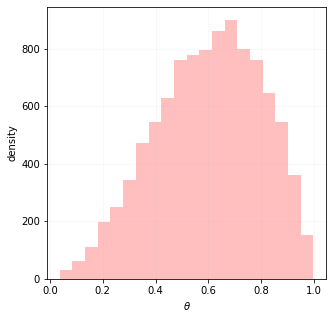

In [3]:
#Simulación inicial de datos
dist_inicial = beta.rvs(a, b, size=10_000)

fig, ax = plt.subplots(figsize=(5,5))

#Contenido de figura
ax.hist(x=dist_inicial, bins=20, color='red', alpha=0.25)

#Anotaciones y estilo
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('density')
ax.grid(alpha=0.1)

plt.show()

>Con probabilidad 0.95 se puede creer que la proporción de niños $\theta$ está entre valores:

In [4]:
pd.DataFrame(dist_inicial).quantile([0.025, 0.975]).rename(columns={0:'theta'}).T

,0.025,0.975
theta,0.194729,0.934591


2) Usando tu inicial de $a)$ grafica la posterior y decide si es creíble que las parejas que toman la medicina tienen una probabilidad de `0.5` de concebir un niño.

>Hasta ahora sabemos que:
>* Verosimilitud: $P(X|\theta)\propto \theta^k(1-\theta)^{n-k}$
>* Dist. inicial: $P(\theta)\propto \theta^{a-1}(1-\theta)^{b-1}$
>
>Entonces, la posterior resulta en:
>$P(\theta|X)\propto \theta^{k+a-1}(1-\theta)^{n-k+b-1} = Beta(k+a,\,\,\, n-k+b)$
>
>Donde:
>* $n$: Total de concepciones
>* $k$: Niños concebidos
>* $a,b$: Parámetros de la inicial

In [5]:
n, k = 50, 30
dist_posterior = beta.rvs(k+a, n-k+b, size=10_000)

>Examinamos la forma que tomaría la distribución inicial:

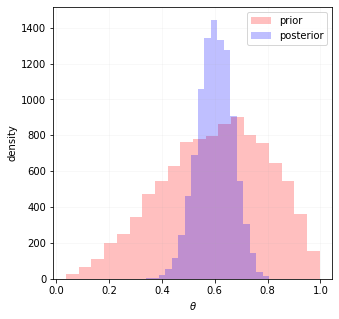

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

#Contenido de figura
ax.hist(x=dist_inicial, bins=20, color='red', alpha=0.25, label='prior')
ax.hist(x=dist_posterior, bins=20, color='blue', alpha=0.25, label='posterior')

#Anotaciones y estilo
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('density')
ax.grid(alpha=0.1)
ax.legend()

plt.show()

>Bajo la distribución posterior, observamos el valor del parámetro $\theta$ en el cuantil `0.05`

In [7]:
pd.DataFrame(dist_posterior).quantile([0.05]).rename(columns={0:'theta'}).T

,0.05
theta,0.490434


>Observamos que en el cuantil `0.05` el parámetro $\theta\approx0.49$, lo que quiere decir que se requiere de un valor tan extermo como `0.49` o más pequeño, para tener una probabilidad menor a `0.05` de observar este parámetro. Dicho lo anterior, dado que un parámetro de `0.5` es mayor que `0.49`, entonces se puede creer que las personas que toman la medicina tienen esta probabilidad de concebir un niño.

3) Supón que la farmacéutica asevera que la probabilidad de concebir un niño cuando se toma la medicina es cercana al $60\%$. Representa esta postura con una distribución inicial $Beta(60,40)$. Compárala con la inicial de un escéptico que afirma que la medicina no hace diferencia, representa esta creencia con una inicial $Beta(50,50)$. ¿Cómo se compara la probabilidad posterior de concebir un niño usando las distintas iniciales?

In [8]:
def simular_beta_binomial(a, b, n, k):
    #Simulación inicial de datos
    dist_inicial = beta.rvs(a, b, size=10_000)
    dist_posterior = beta.rvs(k+a, n-k+b, size=10_000)
    
    return dist_inicial, dist_posterior

In [9]:
n, k = 50, 30

inicial_farma, posterior_farma = simular_beta_binomial(a=60, b=40, n=n, k=k)
inicial_escept, posterior_escept = simular_beta_binomial(a=50, b=50, n=n, k=k)

>Examinamos la forma que tomaría la distribución inicial:

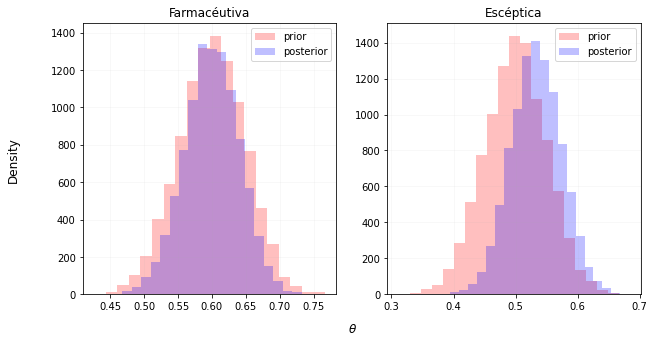

In [11]:
fig = plt.figure(figsize=(10,5))
spec = plt.GridSpec(nrows=1, ncols=2)

#Farmacéutica
ax0 = fig.add_subplot(spec[0])
ax0.hist(x=inicial_farma, bins=20, color='red', alpha=0.25, label='prior')
ax0.hist(x=posterior_farma, bins=20, color='blue', alpha=0.25, label='posterior')
ax0.set_title('Farmacéutiva')
ax0.grid(alpha=0.1)
ax0.legend()

#Escéptica
ax1 = fig.add_subplot(spec[1])
ax1.hist(x=inicial_escept, bins=20, color='red', alpha=0.25, label='prior')
ax1.hist(x=posterior_escept, bins=20, color='blue', alpha=0.25, label='posterior')
ax1.set_title('Escéptica')
ax1.grid(alpha=0.1)
ax1.legend()

#Anotaciones y estilo global
fig.supxlabel(r'$\theta$', fontsize=12)
fig.supylabel('Density', fontsize=12)

plt.show()

**Observaciones**:
* En ambas posturas, la desviación estándar de los parámetros es muy similar, tanto en las distribuciones iniciales como las posteriores.
* En la postura de la farmacéutica, la posterior y la inicial son práctiamente las mismas, y están centradas en `0.6` que es el valor indicado por la farmacéutica.
* En la postura escéptica, vemos que la inicial está centrada en `0.5` y la posterior, si bien está centrada en un valor mayor a `0.5`, no alcanza el valor indicado por la farmacéutica en `0.6`.
* En el caso de la postura escéptica, el desplazamiento de la distribución no es tan radical como en el inciso $2)$ (en donde eran $n=3+2=5$ casos), debido a que se simuló la inicial con $n=50+50=100$ casos. Esto le da mayor peso a la inicial sobre la verosimilitud, y por tanto la magnitud de su desplazamiento no es tan grande.

## Normal-Normal